In [0]:
import torch
import torch.nn as nn
from torch.nn import functional as F

import  torch.optim as optim
from  torchvision import datasets, transforms

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 激活函数

sigmoid

tanh

relu

In [66]:
# sigmoid函数
# 首先得到一个从-100到100划分的10维向量
a = torch.linspace(-100, 100, 10)
a

tensor([-100.0000,  -77.7778,  -55.5556,  -33.3333,  -11.1111,   11.1111,
          33.3333,   55.5555,   77.7778,  100.0000])

In [67]:
torch.sigmoid(a)

tensor([0.0000e+00, 1.6655e-34, 7.4564e-25, 3.3382e-15, 1.4945e-05, 9.9999e-01,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00])

In [68]:
# F中之前也有，但是过时了
F.sigmoid(a)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([0.0000e+00, 1.6655e-34, 7.4564e-25, 3.3382e-15, 1.4945e-05, 9.9999e-01,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00])

In [69]:
# tanh
a = torch.linspace(-1, 1, 10)
torch.tanh(a)

tensor([-0.7616, -0.6514, -0.5047, -0.3215, -0.1107,  0.1107,  0.3215,  0.5047,
         0.6514,  0.7616])

In [70]:
torch.relu(a)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1111, 0.3333, 0.5556, 0.7778,
        1.0000])

In [71]:
F.relu(a)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1111, 0.3333, 0.5556, 0.7778,
        1.0000])

## 常见损失函数

Mean Squared Error(MSL)

Cross Entropy Loss：在逻辑回归中讲

常用于:

binary

muti-class

softmax

leave it to Logistic Regression Part

In [0]:
# Mean Squared Error(MSL)
# 使用Pythoch自动求导

In [73]:
x = torch.ones(1)
w = torch.full([1], 2)
mse = F.mse_loss(torch.ones(1), x*w)
mse

tensor(1.)

In [0]:
# torch.autograd.grad(mse, [w])

In [0]:
# w.requires_grad_()
# 等价于 
w = torch.tensor([2.], requires_grad=True)

In [0]:
# 这里未设置w为求导变量,需要更新计算图
# torch.autograd.grad(mse, [w])

In [0]:
# 设置完求导信息后，需要更新计算图
mse = F.mse_loss(torch.ones(1), x*w)

In [78]:
# 使用autograd进行求导
# loss = (1 - 2)^2
torch.autograd.grad(mse, [w])

(tensor([2.]),)

In [79]:
# 使用backward进行求导
x = torch.ones(1)
w = torch.full([1], 2)
mse = F.mse_loss(torch.ones(1), x*w)

w.requires_grad_()
# 构建动态图
mse = F.mse_loss(torch.ones(1), x*w)
mse.backward()
w.grad

tensor([2.])

In [0]:
# softmax

In [81]:
a = torch.rand(3)
a.requires_grad_()

tensor([0.0478, 0.9534, 0.2825], requires_grad=True)

In [82]:
p = F.softmax(a, dim=0)
p.shape

torch.Size([3])

In [83]:
p[2].backward(retain_graph=True)

a.grad
# 不使用 retain_graph=True 只能保留一次导数信息,然后将图清楚
# p.backward(retain_graph=True)

tensor([-0.0563, -0.1393,  0.1957])

In [84]:
torch.autograd.grad(p[1], [a], retain_graph=True)

(tensor([-0.1102,  0.2495, -0.1393]),)

In [85]:
torch.autograd.grad(p[2], [a])

(tensor([-0.0563, -0.1393,  0.1957]),)

## 感知机

In [86]:
x = torch.randn(1, 10)
w = torch.randn(1, 10, requires_grad=True)
o = torch.sigmoid(x@w.t())
o.shape

torch.Size([1, 1])

In [87]:
loss = F.mse_loss(torch.ones(1,1), o)
loss.shape

torch.Size([])

In [88]:
loss.backward()
w.grad

tensor([[-2.6105e-05,  1.9031e-04,  6.9241e-05, -1.7887e-04,  3.2363e-04,
         -3.0179e-05,  3.5977e-04, -3.5360e-04,  1.9482e-04,  1.0913e-04]])

## 多层感知机

In [89]:
x = torch.randn(1, 10)
w = torch.randn(2, 10, requires_grad=True)
o = torch.sigmoid(x@w.t())
o.shape

torch.Size([1, 2])

In [90]:
loss = F.mse_loss(torch.ones(1,2), o)
loss

tensor(0.1999, grad_fn=<MeanBackward0>)

In [91]:
loss.backward()
w.grad

tensor([[-0.1203,  0.0485,  0.1722, -0.0890,  0.0407,  0.2356,  0.0416, -0.1200,
          0.1062,  0.1708],
        [-0.0824,  0.0332,  0.1179, -0.0609,  0.0279,  0.1614,  0.0285, -0.0822,
          0.0727,  0.1170]])

## 优化

In [0]:
def himmelbalu(x):
  return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) **2

In [93]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y range:', x.shape, y.shape)

x,y range: (120,) (120,)


In [94]:
# 三个平面，每个平面都是(120,120)的矩阵
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)

X,Y maps: (120, 120) (120, 120)


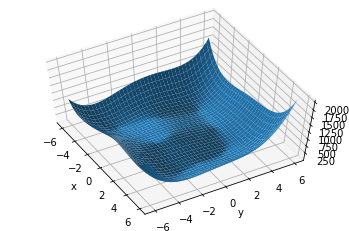

In [95]:
Z = himmelbalu([X, Y])
fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [96]:
# 使用随机梯度下降进行优化
# [1., 0.], [-4, 0.], [4, 0.]
x = torch.tensor([0., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):

    pred = himmelbalu(x)

    optimizer.zero_grad()
    pred.backward()
    optimizer.step()

    if step % 2000 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.tolist(), pred.item()))

step 0: x = [0.0009999999310821295, 0.0009999999310821295], f(x) = 170.0
step 2000: x = [2.3331806659698486, 1.9540694952011108], f(x) = 13.730916023254395
step 4000: x = [2.9820079803466797, 2.0270984172821045], f(x) = 0.014858869835734367
step 6000: x = [2.999983549118042, 2.0000221729278564], f(x) = 1.1074007488787174e-08
step 8000: x = [2.9999938011169434, 2.0000083446502686], f(x) = 1.5572823031106964e-09
step 10000: x = [2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step 12000: x = [2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step 14000: x = [2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step 16000: x = [3.0, 2.0], f(x) = 0.0
step 18000: x = [3.0, 2.0], f(x) = 0.0


## 交叉熵

In [0]:
a = torch.full([4], 1/4.)

In [98]:
a * torch.log2(a)

tensor([-0.5000, -0.5000, -0.5000, -0.5000])

In [99]:
-(a*torch.log2(a)).sum()

tensor(2.)

In [100]:
a = torch.tensor([0.1, 0.1, 0.1, 0.7])
-(a*torch.log2(a)).sum()

tensor(1.3568)

In [101]:
a = torch.tensor([0.001, 0.001, 0.001, 0.997])
-(a*torch.log2(a)).sum()

tensor(0.0342)

## 使用交叉熵的预测问题

In [102]:
x = torch.randn(1, 784)
w = torch.randn(10, 784)

logits = x@w.t()
logits.shape

torch.Size([1, 10])

In [103]:
# 直接使用 cross_entropy 可以直接得到结果
# cross_entropy 中已将包括softmax层，传入值只能为logits，不能为pred
# 相当于 softmax + log + nllloss
F.cross_entropy(logits, torch.tensor([3]))

tensor(93.7558)

In [104]:
pred = F.softmax(logits, dim=1)
pred

tensor([[8.3273e-33, 2.6879e-20, 6.3086e-10, 1.9160e-41, 7.3961e-23, 4.6504e-20,
         1.0480e-27, 4.0264e-30, 1.0000e+00, 3.8320e-25]])

In [105]:
pred_log = torch.log(pred)
pred_log

tensor([[-73.8658, -45.0630, -21.1839, -93.7558, -50.9585, -44.5148, -62.1229,
         -67.6847,   0.0000, -56.2212]])

In [106]:
# 使用预测值计算交叉熵
F.nll_loss(pred_log, torch.tensor([3]))

tensor(93.7558)

## 多分类问题实战

In [0]:
batch_size=200
learning_rate=0.01
epochs=10

In [0]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_size, shuffle=True)

In [109]:
w1, b1 = torch.randn(200, 784, requires_grad=True),\
         torch.zeros(200, requires_grad=True)
w2, b2 = torch.randn(200, 200, requires_grad=True),\
         torch.zeros(200, requires_grad=True)
w3, b3 = torch.randn(10, 200, requires_grad=True),\
         torch.zeros(10, requires_grad=True)

torch.nn.init.kaiming_normal_(w1)
torch.nn.init.kaiming_normal_(w2)
torch.nn.init.kaiming_normal_(w3)

tensor([[-0.0003,  0.0633, -0.1362,  ...,  0.0077,  0.0712,  0.0207],
        [ 0.0708, -0.0934,  0.0177,  ...,  0.0702, -0.0745,  0.0139],
        [ 0.0133,  0.1130, -0.0020,  ...,  0.0199, -0.1057, -0.0801],
        ...,
        [-0.0324,  0.1108,  0.0940,  ...,  0.0401,  0.1790,  0.0083],
        [-0.0113, -0.1075,  0.0611,  ..., -0.0630,  0.0302,  0.0873],
        [-0.0263, -0.0498, -0.1264,  ...,  0.1128, -0.0459, -0.0986]],
       requires_grad=True)

In [0]:
def forward(x):
    x = x@w1.t() + b1
    x = F.relu(x)
    x = x@w2.t() + b2
    x = F.relu(x)
    x = x@w3.t() + b3
    x = F.relu(x)
    return x

In [0]:
optimizer = optim.SGD([w1, b1, w2, b2, w3, b3], lr=learning_rate)
criteon = nn.CrossEntropyLoss()

In [112]:
for epoch in range(epochs):
  for batch_idx, (data, target) in enumerate(train_loader):
    # the size -1 is inferred from other dimensions
    data = data.view(-1, 28*28)

    logits = forward(data)
    loss = criteon(logits, target)

    optimizer.zero_grad()
    loss.backward()
    # print(w1.grad.norm(), w2.grad.norm())
    optimizer.step()

    if batch_idx % 100 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.606536
Train Epoch: 0 [20000/60000 (33%)]	Loss: 1.282263
Train Epoch: 0 [40000/60000 (67%)]	Loss: 1.231914
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.916089
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.919712
Train Epoch: 1 [40000/60000 (67%)]	Loss: 1.038049
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.917733
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.862438
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.907626
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.948991
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.957688
Train Epoch: 3 [40000/60000 (67%)]	Loss: 1.001066
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.806063
Train Epoch: 4 [20000/60000 (33%)]	Loss: 0.822703
Train Epoch: 4 [40000/60000 (67%)]	Loss: 0.775278
Train Epoch: 5 [0/60000 (0%)]	Loss: 1.006072
Train Epoch: 5 [20000/60000 (33%)]	Loss: 0.759203
Train Epoch: 5 [40000/60000 (67%)]	Loss: 0.934535
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.907168
Train Epoch: 6 [20000/60000 (33%)]	Loss: 0.865309
Train Epoch: 6 [40000/60000 (67%)]	

In [113]:
test_loss = 0
correct = 0
for data, target in test_loader:
    data = data.view(-1, 28 * 28)
    logits = forward(data)
    test_loss += criteon(logits, target).item()

    pred = logits.data.max(1)[1]
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


Test set: Average loss: 0.0041, Accuracy: 6757/10000 (67%)



## 框架版本

In [0]:
batch_size=200
learning_rate=0.01
epochs=10

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_size, shuffle=True)

In [0]:
class MLP(nn.Module):
  
  def __init__(self):
    super(MLP, self).__init__()
    
    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.ReLU(inplace=True),
        nn.Linear(200, 200),
        nn.ReLU(inplace=True),
        nn.Linear(200, 10),
        nn.ReLU(inplace=True),
    )
    
  
  def forward(self, x):
    x = self.model(x)
    return x

In [0]:
net = MLP()
# net.parameters()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
criteon = nn.CrossEntropyLoss()

In [117]:
for epoch in range(epochs):
  
  for batch_idx, (data, target) in enumerate(train_loader):
    
    data = data.view(-1, 28*28)
    logits = net(data)
    loss = criteon(logits, target)
    
    optimizer.zero_grad()
    loss.backward()
#     print(w1.grad.norm(), w2.grad.norm())
    optimizer.step()
  
    if batch_idx % 100 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
              200. * batch_idx / len(train_loader), loss.item()))
     
  test_loss = 0
  correct = 0
  for data, target in test_loader:
    data = data.view(-1, 28*28)
    logits = net(data)
    test_loss += criteon(logits, target).item()

    pred = logits.data.max(1)[1]
    correct += pred.eq(target.data).sum()

  test_loss /= len(test_loader.dataset)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.296268
Train Epoch: 0 [20000/60000 (33%)]	Loss: 2.005683
Train Epoch: 0 [40000/60000 (67%)]	Loss: 1.510091

Test set: Average loss: 0.0055, Accuracy: 6914/10000 (69%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 1.016362
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.930025
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.764111

Test set: Average loss: 0.0034, Accuracy: 8004/10000 (80%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.669552
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.609003
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.688339

Test set: Average loss: 0.0029, Accuracy: 8163/10000 (81%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.699187
Train Epoch: 3 [20000/60000 (33%)]	Loss: 0.782740
Train Epoch: 3 [40000/60000 (67%)]	Loss: 0.535048

Test set: Average loss: 0.0027, Accuracy: 8224/10000 (82%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.580347
Train Epoch: 4 [20000/60000 (33%)]	Loss: 0.401737
Train Epoch: 4 [40000/60000 (67%)]	Loss: 0.519672

Test set: Average loss: 0.0026

## 激活函数与GPU加速

In [0]:
batch_size=200
learning_rate=0.01
epochs=10

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_size, shuffle=True)

In [0]:
class MLP(nn.Module):
  
  def __init__(self):
    super(MLP, self).__init__()
    
    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.ReLU(inplace=True),
        nn.Linear(200, 200),
        nn.ReLU(inplace=True),
        nn.Linear(200, 10),
        nn.ReLU(inplace=True),
    )
    
  
  def forward(self, x):
    x = self.model(x)
    return x

In [0]:
device = torch.device('cuda:0')
net = MLP().to(device)
# net.parameters()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
criteon = nn.CrossEntropyLoss().to(device)

In [138]:
for epoch in range(epochs):
  
  # batch_idx 是将数据按batch_size划分之后，每个batch的序列号
  # data 为每个 batch 的数据，len(data)即为batch_size
  # target 为每个data对应的label
  for batch_idx, (data, target) in enumerate(train_loader):
    
    data = data.view(-1, 28*28)
    data, target = data.to(device), target.cuda()
    
    logits = net(data)
    loss = criteon(logits, target)
    
    optimizer.zero_grad()
    loss.backward()
#     print(w1.grad.norm(), w2.grad.norm())
    optimizer.step()
  
    if batch_idx % 50 == 0 or batch_idx == 299:
      # len(train_loader)等于300（从0-299），因为60000个数据，200个batch，每个batch300个数据
      print('Train Epoch: {} [{}/{} ({:.0f}%)] \t batch_index:{} \t Loss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
              100. * batch_idx / len(train_loader), batch_idx, loss.item()))
     
  test_loss = 0
  correct = 0
  for data, target in test_loader:
    data = data.view(-1, 28*28)
    # cuda()方法不推荐
    data, target = data.to(device), target.cuda()
    logits = net(data)
    test_loss += criteon(logits, target).item()
    
    pred = logits.data.max(1)[1]
    correct += pred.eq(target.data).sum()

  test_loss /= len(test_loader.dataset)
  print('\n Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

Train Epoch: 0 [0/60000 (0%)] 	 batch_index:0 	 Loss: 0.259984
Train Epoch: 0 [10000/60000 (17%)] 	 batch_index:50 	 Loss: 0.279311
Train Epoch: 0 [20000/60000 (33%)] 	 batch_index:100 	 Loss: 0.338599
Train Epoch: 0 [30000/60000 (50%)] 	 batch_index:150 	 Loss: 0.297516
Train Epoch: 0 [40000/60000 (67%)] 	 batch_index:200 	 Loss: 0.351190
Train Epoch: 0 [50000/60000 (83%)] 	 batch_index:250 	 Loss: 0.287821
Train Epoch: 0 [59800/60000 (100%)] 	 batch_index:299 	 Loss: 0.251779

Test set: Average loss: 0.0017, Accuracy: 8671/10000 (86%)

Train Epoch: 1 [0/60000 (0%)] 	 batch_index:0 	 Loss: 0.323170
Train Epoch: 1 [10000/60000 (17%)] 	 batch_index:50 	 Loss: 0.353210
Train Epoch: 1 [20000/60000 (33%)] 	 batch_index:100 	 Loss: 0.269891
Train Epoch: 1 [30000/60000 (50%)] 	 batch_index:150 	 Loss: 0.269682
Train Epoch: 1 [40000/60000 (67%)] 	 batch_index:200 	 Loss: 0.360044
Train Epoch: 1 [50000/60000 (83%)] 	 batch_index:250 	 Loss: 0.232264
Train Epoch: 1 [59800/60000 (100%)] 	 batch_

In [0]:
# 使用argmax来验证数据集

In [140]:
logits = torch.rand(4, 10)
pred = F.softmax(logits, dim=1)
pred.shape

torch.Size([4, 10])

In [141]:
pred_label = pred.argmax(dim=1)
pred_label

tensor([1, 5, 5, 2])

In [142]:
# sigmid函数不改变函数的单调性，所以值不会变
logits.argmax(dim=1)

tensor([1, 5, 5, 2])

In [143]:
label = torch.tensor([6, 0, 1, 2])
correct = torch.eq(pred_label, label)
correct

tensor([0, 0, 0, 1], dtype=torch.uint8)

In [144]:
# 正确率：相同的个数/总个数
correct.sum().float().item()/4

0.25

## Visdom可视化

见jupyter notebook
暂时不知道colab如何使用visdom

## 防止过拟合的方法

### 交叉验证

### Regularization

### 动量与学习速率衰减

### early stop，dropout

In [0]:
batch_size=200
learning_rate=0.01
epochs=10

In [4]:
# 交叉验证
# 将train dataset拆分为train data和validation

# train_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../data', train=True, download=True,
#                    transform=transforms.Compose([
#                        transforms.ToTensor(),
#                        transforms.Normalize((0.1307,), (0.3081,))
#                    ])),
#     batch_size=batch_size, shuffle=True)
# 等价于下边

train_db = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

train_loader = torch.utils.data.DataLoader(
    train_db,
    batch_size=batch_size, shuffle=True)



test_db = datasets.MNIST('../data', train=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
]))

test_loader = torch.utils.data.DataLoader(test_db,
    batch_size=batch_size, shuffle=True)

print('train:', len(train_db), 'test:', len(test_db))

0it [00:00, ?it/s]

9920512it [00:02, 3826191.68it/s]                            


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 57821.10it/s]                           
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 969593.75it/s]                             
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21726.94it/s]            

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
train: 60000 test: 10000


In [5]:
# 将train的数据划分为validation和train的数据，比例如下
train_db, val_db = torch.utils.data.random_split(train_db, [50000, 10000])
print('db1:', len(train_db), 'db2:', len(val_db))

db1: 50000 db2: 10000


In [0]:
# 包装成 DataLoader
train_loader = torch.utils.data.DataLoader(
    train_db,
    batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(
    val_db,
    batch_size=batch_size, shuffle=True)

In [0]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()

    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.LeakyReLU(inplace=True),
        nn.Linear(200, 200),
        nn.LeakyReLU(inplace=True),
        nn.Linear(200, 10),
        nn.LeakyReLU(inplace=True),
    )

  def forward(self, x):
    x = self.model(x)
    return x

In [0]:
device = torch.device('cuda:0')
net = MLP().to(device)
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
criteon = nn.CrossEntropyLoss().to(device)

In [15]:
for epoch in range(epochs):
  for batch_idx, (data, target) in enumerate(train_loader):
    data = data.view(-1, 28*28)
    data, target = data.to(device), target.cuda()

    logits = net(data)
    loss = criteon(logits, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
                   100. * batch_idx / len(train_loader), loss.item()))
    
  test_loss = 0
  correct = 0

  # 这里需要使用验证集获得准确率
  for data, target in val_loader:
      data = data.view(-1, 28 * 28)
      data, target = data.to(device), target.cuda()
      logits = net(data)
      test_loss += criteon(logits, target).item()

      pred = logits.data.max(1)[1]
      correct += pred.eq(target.data).sum()

  test_loss /= len(val_loader.dataset)
  print('\nVAL set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
      test_loss, correct, len(val_loader.dataset),
      100. * correct / len(val_loader.dataset)))

test_loss = 0
correct = 0
# 使用测试集得到最终的准确率
for data, target in test_loader:
    data = data.view(-1, 28 * 28)
    data, target = data.to(device), target.cuda()
    logits = net(data)
    test_loss += criteon(logits, target).item()

    pred = logits.data.max(1)[1]
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

Train Epoch: 0 [0/50000 (0%)]	Loss: 0.145223
Train Epoch: 0 [20000/50000 (40%)]	Loss: 0.243435
Train Epoch: 0 [40000/50000 (80%)]	Loss: 0.200279

VAL set: Average loss: 0.0012, Accuracy: 9322/10000 (93%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 0.243597
Train Epoch: 1 [20000/50000 (40%)]	Loss: 0.164248
Train Epoch: 1 [40000/50000 (80%)]	Loss: 0.169009

VAL set: Average loss: 0.0011, Accuracy: 9328/10000 (93%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.208148
Train Epoch: 2 [20000/50000 (40%)]	Loss: 0.261537
Train Epoch: 2 [40000/50000 (80%)]	Loss: 0.157143

VAL set: Average loss: 0.0011, Accuracy: 9375/10000 (93%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.246315
Train Epoch: 3 [20000/50000 (40%)]	Loss: 0.185275
Train Epoch: 3 [40000/50000 (80%)]	Loss: 0.140279

VAL set: Average loss: 0.0011, Accuracy: 9399/10000 (93%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.234416
Train Epoch: 4 [20000/50000 (40%)]	Loss: 0.240349
Train Epoch: 4 [40000/50000 (80%)]	Loss: 0.161738

VAL set: Average loss: 0.0010, Acc

In [0]:
# 正则化：Enforce weights close to 0
# 如果没有overfitting，设置了weightdecay，会使模型性能急剧下降。
# 因为如果没有overfitting，说明表达能力不足，那么再通过约束，会使得性能继续下降。

# 设置L2范数会使w->0,λ=0.01
optimizer = optim.SGD(net.parameters(), lr=learning_rate， weight_decay=0.01)

In [0]:
# L1范数
regularization_loss = 0

for param in net.parameters():
  regularization_loss += torch.sum(torch.abs(param))

classify_loss = criteon(logits, target)
loss = classify_loss + 0.01 * regularization_loss

optimizer.zero_grad()
loss.backward()
optimizer.step()

In [0]:
# 动量
momentum_rate = 0.78
optimizer = optim.SGD(net.parameters(), lr=learning_rate， 
                      weight_decay=0.01, momentum=momentum_rate)




In [0]:
# 学习速率衰减
# 方法一
# ReduceLROnPlateau函数
# 第一个参数：传入optimizer将learning reate交给ReduceLROnPlateau管理
# 第二个参数：函数会监听Loss，如果函数在最小值停留很久（连续调用很多个epoch），那么就会减小学习速率
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

# for epoch in xrange(args.start_epoch, args.epochs):
#   train(train_loader, model, criterion, optimizer, epoch)
#   result_avg, loss_val = validate(val_loader, model, criterion, epoch)
  # 每调用一次，监听一次Loss，如果长时间不变会减半
  scheduler.step(loss_val)

# 方法二
# Assuming optimizer use lr=0.05 for all groups
# lr = 0.05   if epoach < 30
# lr = 0.005   if 30 <= epoach < 60
# lr = 0.00005   if 60 <= epoach < 90
# ...
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)
for epoach in range(100):
  scheduler.step()
#   train(...)
#   validate(...)

In [0]:
# early stop

In [0]:
# dropout
class MLP2(nn.Module):

    def __init__(self):
        super(MLP2, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            # 参数为断掉的概率，和tensorflow中相反为保持的概率
            nn.Dropout(0.5),
            nn.LeakyReLU(inplace=True),
            nn.Linear(200, 200),
            nn.Dropout(0.5),
            nn.LeakyReLU(inplace=True),
            nn.Linear(200, 10),
            nn.Dropout(0.5),
            nn.LeakyReLU(inplace=True),
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [0]:
# 在train的时候连接可能是断的，而在test的时候需要连接上
for epoch in range(epochs):
  # train
  net_dropped.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    ...
    # 之后将不适用dropout
    net_dropped.eval()
    
    test_loss = 0
    correct = 0
    
    for data, target in test_loader:
      ...